# Exploratory Data Analysis (EDA)

In this report [^1], we have to train machine learning model(s) using Python to predict whether an employee will leave the company or not. For this task, two datasets **train.csv** and **test.csv** have been provided. As the name suggests, the dataset **train.csv** will be used to train the model. In other words, we will use this dataset (**train.csv**) to predict whether  employees given in the dataset **test.csv** are going to quit by understanding the main drivers of employee churn.

[^1]: Sudhakar Kumar (183236001).

## Importing the Data

First, we import the dataset **train.csv** by reading it into a new pandas dataframe. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Read train.csv file 
data = pd.read_csv('train.csv')

# Display the size of training data 
shape = data.shape
print("Number of datapoints/rows in the training dataset is: "+ str(shape[0]))
print("Number of features/columns in the training dataset is: "+ str(shape[1]))

Number of datapoints/rows in the training dataset is: 1028
Number of features/columns in the training dataset is: 34


As we can see, the training dataset (referred to as **data** hereafter) contains 1,028 rows and 34 columns. It means that we have information on **1,028 employees** on **34 features**. Now, we can view the names of the features available in **data** by using *columns* function, as shown in the **Kaggle Notebook**.

Once the **data** is read into a new pandas dataframe, we can use gain some information on this by using *info* function. Next, we can print the first few datapoints (rows) of data to understand the data by using *heads* function. As shown in the **Notebook**, there are various numerical and categorical features such as **Age**, **Attrition**, **BusinessTravel**, etc, which provide information on employees' personal and employment details. Out of all the columns, **Attrition** is the label and remaining columns are features of the employees. Given that we have data on former employees, this is a standard supervised classification problem where the label (**Attrition**) is a binary variable: 0 (active employee), 1 (former employee).

Additionally, we check whether there is any missing values in data by using *isnull* function. As shown in the **Notebook**, the **data** has no missing values.

## Overview of Numerical Features  
According to [Wikipedia](https://en.wikipedia.org/wiki/Outlier), an outlier is a data point that differs significantly from other observations. To detect outlier(s) in **data**, we have used *describe* function to inspect the range of values in each feature. Also, we can visualize the distribution of features across datapoints by plotting histograms of **numerical** features, as shown below.

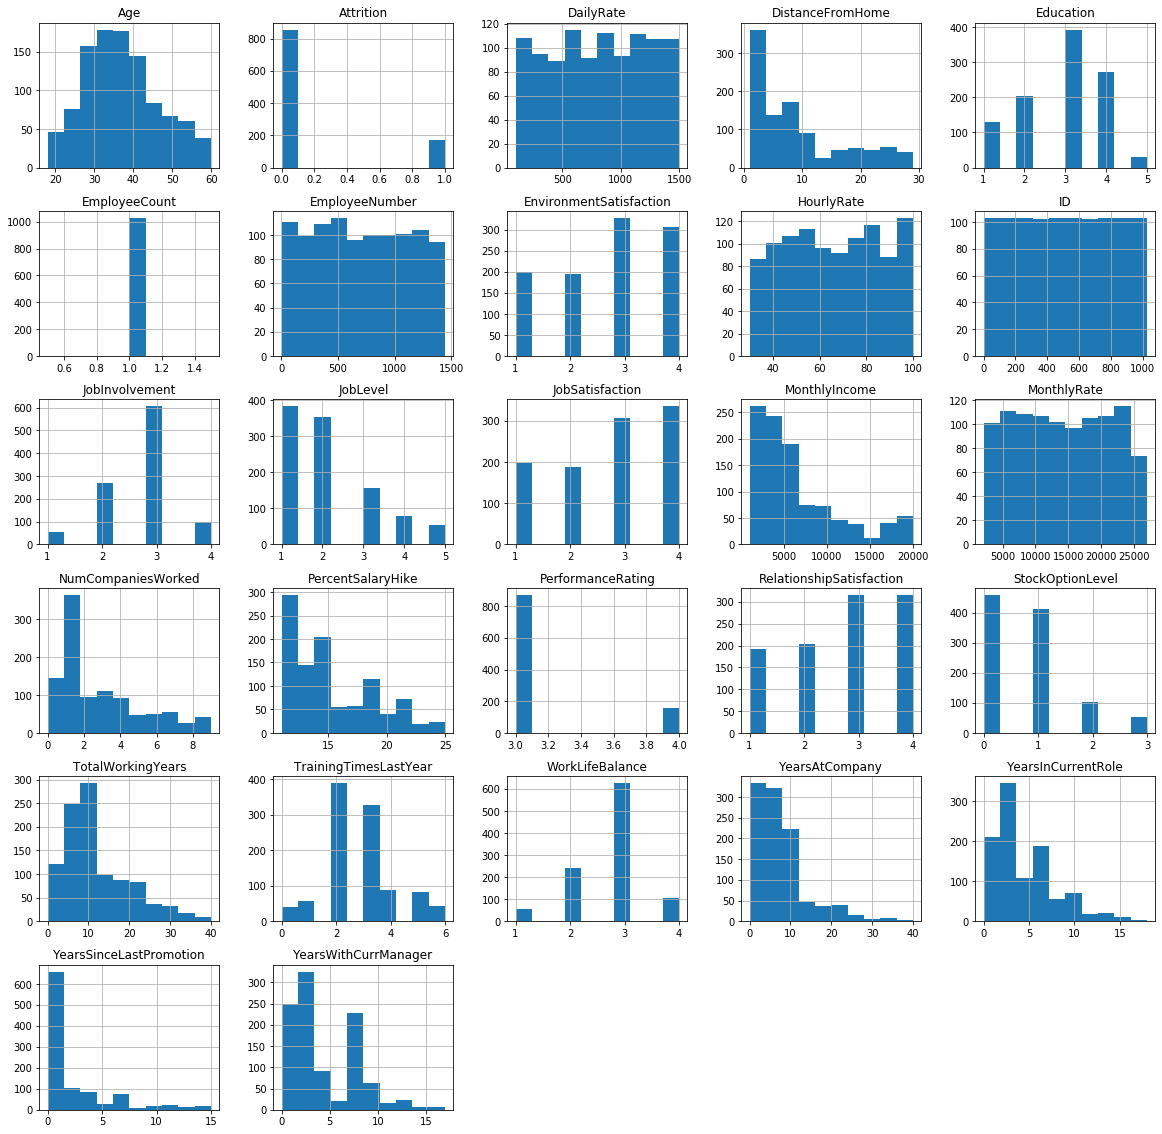

In [7]:
data.hist(figsize = (20,20))
plt.show()

From the histograms shown, we can draw some observations as given below: 

* **Age** is a slightly right-skewed normal distribution with the majority of the employees lying between 30 and 40 years old.
* **EmployeeCount** is a constant value for all employees. It's likely to be a redundant feature.
* **EmployeeNumber** and **ID** are likely to be unique identifiers for employees. Thus, they won't affect the attrition. 

## Exploring the Target Variable: Attrition

This Machine Learning problem is all about the feature **Attrition**.  We are trying to predict the value of the feature **Attrition** by using other important features associated with the employees' personal and employment details. Before we move further, we shall find out the number of employees who left the company and those who didn’t:

As we can see in the **Notebook**, there are 172 employees who left the company and 856 employees who didn't. Thus, we can conclude that 

* The percentage of current employees is 83.26% and that of ex-employees is 16.74%. 
* This is an **imbalanced class** problem.

We are aware of the fact that Machine Learning algorithms typically work best when the number of instances of each classes are roughly equal. Therefore, we will have to address this class imbalance prior to implementing our Machine Learning algorithms.

We can also draw a bar chart to visualize the existing imbalance between the two classes of **Attrition**. 

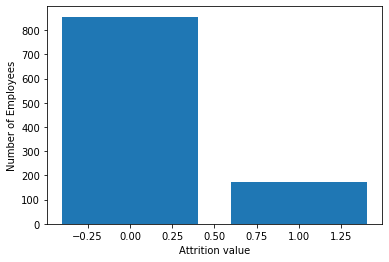

In [3]:
# Plot the two attrition values (0 and 1) 
attrition_count = data.groupby('Attrition').count()
plt.bar(attrition_count.index.values, attrition_count['JobSatisfaction'])
plt.xlabel('Attrition value')
plt.ylabel('Number of Employees')
plt.show()

## Correlation of Features 

We will find the features which are highly correlated with the label. For this, we will use *corr* function and find out the features with positive correlations and negative correlations, as given below. 

In [4]:
# Find correlations of features with respect to Attrition
data_corr = data.copy()
data_corr['Target'] = data_corr['Attrition']
data_corr = data_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'ID'], axis=1)
correlations = data_corr.corr()['Target'].sort_values()
print('Features with positive correlations: \n', correlations.tail(6))
print("="*45)
print('Features with negative correlations: \n', correlations.head(5))

Features with positive correlations: 
 PerformanceRating     0.005300
PercentSalaryHike     0.008138
MonthlyRate           0.025739
NumCompaniesWorked    0.037174
DistanceFromHome      0.086875
Target                1.000000
Name: Target, dtype: float64
Features with negative correlations: 
 TotalWorkingYears   -0.178842
JobLevel            -0.169121
Age                 -0.168641
MonthlyIncome       -0.163709
StockOptionLevel    -0.160597
Name: Target, dtype: float64


Next, we can draw a **Seaborn Correlation Heatmap** to show the correlations of features. As per the heatmap drawn below, we can corroborate the inter-correlation of features. 

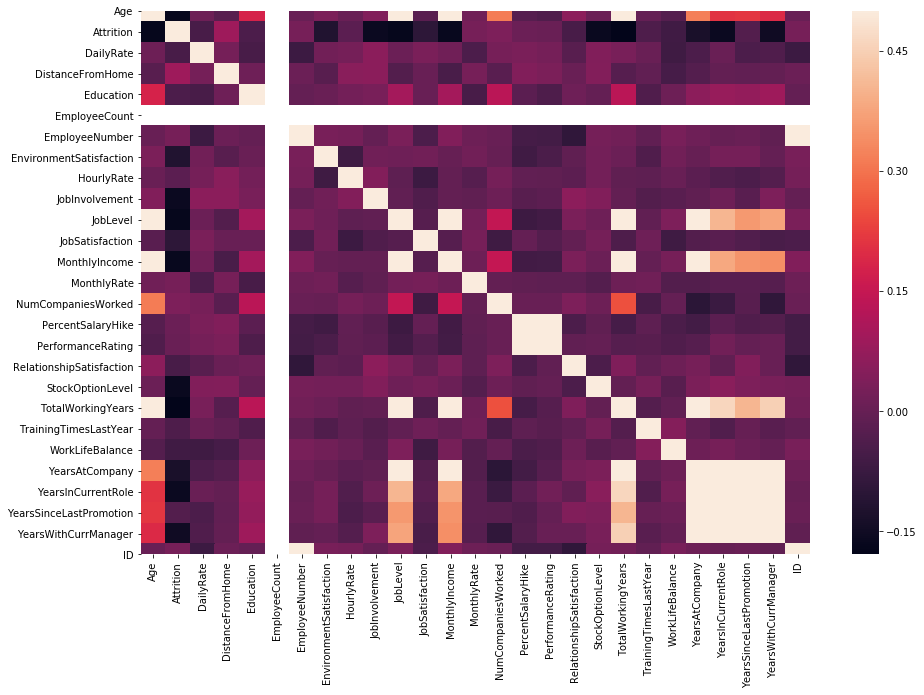

In [37]:
# Draw a heatmap to show the correlations of features
corr_matrix = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, 
            vmax = 0.5)
plt.show()

## Cluster Analysis

Now, we will find out the groups of employees who left. From the correlation values, we can observe that important factors for any employee to stay or leave are **PercentSalaryHike** and **TotalWorkingYears**. So, we will club them in three groups of people using cluster analysis, as shown below:

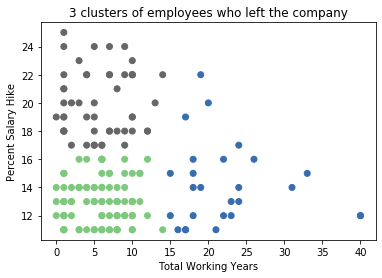

In [5]:
# Analyze the leavers by three clusters 
left_emp =  data[['TotalWorkingYears', 'PercentSalaryHike']][data.Attrition == 1]

# Create groups using K-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['TotalWorkingYears'], left_emp['PercentSalaryHike'], 
            c = left_emp['label'],
            cmap = 'Accent')
plt.xlabel('Total Working Years')
plt.ylabel('Percent Salary Hike')
plt.title('3 clusters of employees who left the company')
plt.show()

From the above cluster analysis, we can conclude that the employees of following type have left: 

* High Total Working Years and Low Percent Salary Hike
* Low Total Working Years and Low Percent Salary Hike 
* Low Total Working Years and High Percent Salary Hike 

## Conclusions of EDA

First, we will get a sense of the features across the two classes of **Attrition** by using *train_data.groupby('Attrition').mean()*. As shown in the **Notebook**, we can conclude that 

* The **data** does not contain any missing or erroneous data values, and all features are of the correct data type.
* There are three redundant features, namely **EmployeeCount**, **EmployeeNumber** and **ID**, which won't affect the target feature (**Attrition**). Hence, these three can be dropped while training a model. 
* The **data** is imbalanced with the majority of employees who have not left the company.
* The strongest positive correlations with the target feature (**Attrition**) are: 
     * **PerformanceRating**,
     * **PercentSalaryHike**, 
     * **MonthlyRate**, 
     * **NumCompaniesWorked**, and  
     * **DistanceFromHome**
* The strongest negative correlations with the target feature (**Attrition**) are: 
     * **TotalWorkingYears**,    
     * **JobLevel**,             
     * **Age**, 
     * **MonthlyIncome**, and 
     * **StockOptionLevel**
* The average **MonthlyIncome** of employees who stayed with the company is higher than that of the employees who left. It indicates that most of the employees that left the company were receiving less monthly income. 
* The average **DistanceFromHome** of employees who stayed with the company is less than that of the employees who left. It means that people who live further away from their work show higher proportion of leavers compared to their counterparts. 
* The average **YearsSinceLastPromotion** of employees who stayed with the company is higher than that of the employees who left. Thus, the employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.
* The average **NumCompaniesWorked** of employees who stayed with the company is less than that of the employees who left. It indicates that the employees that have already worked at several companies previously show higher proportion of leavers compared to their counterparts.

# Data Pre-processing
Here, we perform pre-processing steps to prepare the **data** for implementing Machine Learning algorithms. 

## Removing the Redundant Features 

As per the conclusions of EDA, there are three redundant features, namely **EmployeeCount**, **EmployeeNumber**, and **ID**, which won't affect the target feature (**Attrition**). Hence, we will drop the aforesaid three features. 

In [6]:
# Drop the redundant features 
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'ID'], axis = 1)

## Encoding the Categorical Features 
We know that Machine Learning algorithms can typically only have numerical values as their features. Hence, label encoding becomes necessary as they encode categorical features with numerical values. 

In general, there are two types of categorical features, as given below: 

* **Ordinal** - Features with two or more categories that can be ranked or ordered. For example, we can suppose there is a **salary** feature with its values as **low**, **medium**, and **high**. 
* **Nominal** - Features with two or more categories which do not have an instrinsic order. For example, there is a feature named **Department** in **data** with its values as **Research & Development**, **Sales**, and **Human Resources**. 

As we have only nominal categorical features in **data**, we will encode these features by using *get_dummies* function available in **pandas**. As shown in the **Notebook**, we are passing an argument *drop_first = True* inside the *get_dummies* function, which is to avoid the dummy variable trap. 

In [9]:
# Encode nominal categorical features
data = pd.get_dummies(data, drop_first = True)

In [10]:
# View the dimensions of encoded training data 
shape = data.shape
print("Number of datapoints/rows in the encoded training dataset is: "+ str(shape[0]))
print("Number of features/columns in the encoded training dataset is: "+ str(shape[1]))

Number of datapoints/rows in the encoded training dataset is: 1028
Number of features/columns in the encoded training dataset is: 45


It can be observed that the number of features is increased from **34** to **45**. The encoded dataset can be visualized by using *heads* function. One can also use **LabelEncoder** and/or **OneHotEncoder** available in **sklearn.preprocessing** for encoding the categorical variables. 

## Scaling the Features 

Our **data** has features with a mixtures of scales for various quantities such as **DailyRate**, **DistanceFromHome**, etc. Many Machine Learning methods are more effective if the features have the same scale. Two popular data scaling methods are as given below:

* **Data Normalization** - It refers to rescaling real valued numeric features into the range 0 (or -1) and 1. 
* **Data Standardization** - It  refers to shifting the distribution of each features to have a mean of zero and a standard deviation of one (unit variance).

Thus, these two scaling methods were tried one by one to inspect which one yields a better trained model. In our case, we have used **Standardization** to scale the features.

# Building a Prediction Model

In this section, we train a model which will further be used to predict whether employees given in the dataset **test.csv** will leave the company. For this, we first split the data into training and testing sets. 

## Splitting Train and Test Set

To understand model performance, we will divide the **data** into a training set and a testing set. As stated earlier, the **data** is imbalanced with the majority of employees who have not left the company. Thus, we need to address this class imbalance issue. This can be done by using one of the methods given below:

* Passing **stratify** parameter - In *train_test_split*, we can pass *stratify = y* to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.
* **Upsampling** minority class - It is the process of randomly duplicating observations from the minority class in order to reinforce its signal. There are several heuristics for doing so, but the most common way is to simply resample with replacement.
* **Downsampling** majority Class - It involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm. The most common heuristic for doing so is resampling without replacement. 

With upsampling minority class, the model will learn considerably more about the minority class and won’t just predict the majority class for a given observation. However, there are chances that it might overfit to the characteristics of those observations which we have just duplicated multiple times. That’s where **SMOTE** can be deployed.

* **SMOTE** - It stands for **Synthetic Minority Over-Sampling Technique**. SMOTE is performing the same basic task of creating new data points for the minority class. However, instead of simply duplicating observations, it creates new observations along the lines of a randomly chosen point and its nearest neighbors, which avoids the overfitting of model along the minority class. 

For training one particular model, we follow the steps as given below:

* Build a pipeline that handles all the steps when fitting the classifier, which will have two steps:
    * Standardizing the data to speed up convergence and make all features on the same scale.
    * Applying the classifier we want to use to fit the model.
* Use **GridSearchCV** to tune hyperparameters using 10-folds cross validation. 
* Fit the model using training data. 
* Deploy the model to predict the classes of test data. 

## Training Random Forest 

First, we will start by fitting a **Random Forest classifier** using **unsampled**, **upsampled**, and **downsampled** data. Second, we will evaluate each method using F1 score with cross validation. For the sake of simplicity, we will tune only two hyperparameters: *max_feature* and *min_samples_leaf*. 

As shown in the **Notebook**, the Random Forest model with **upsampled** data shows the highest F1 score, as given below:
![caption](images/random.png)

Thus, we will be training the subsequent models with upsampled data. However, we will be using **SMOTE** for upsampling the minority class. 

## Training K-Nearest Neighbors (KNN)

Here, we fit a **KNN**. It is known that it takes *n_neighbors* points from the training data closest to the point we're interested to predict its class and take the mode (majority vote) of the classes for the neighboring point as its class. For the sake of simplicity, we will tune only two hyperparameters: *n_neighbors* and *weights*. 
As given in the **Notebook**, we obtain the following result: 

![caption](images/knn.png)

## Training Logistic Regression and SVM Classifier 

Similarly, we tried **Logistic Regression** and **Support Vector Machine** (SVM) classifier. The results of these model are as given below:

![caption](images/logistic.png)
![caption](images/svm.png)

## Training Gradient Boosting Classifier

With all the models trained above, we could not find accuracy more than 88%. So, we deployed **Gradient Boosting Classifier (GBC)** for increasing the accuracy. It may be noted that GBC and RF both are ensemble learning methods and predict the labels by combining the outputs from individual trees. According to one [discussion](https://www.quora.com/Why-does-Gradient-boosting-work-so-well-for-so-many-Kaggle-problems) on Quora, **Gradient Boosting (GB)** does very well because it is a robust out of the box classifier that can perform on a dataset on which minimal effort has been spent on cleaning and can learn complex non-linear decision boundaries via boosting. 

Following are some of the significant features of **GB**: 

* The comparative scales of the features don’t really matter, as it is an ensemble learning method and a decision tree considers each feature separately for splitting. 
* It doesn’t require any special treatment for outliers.
* It is not affected by the collinearity of features since collinearity does not affect decision trees. 
* Gradient Boosted trees try to learn a more and more complex decision boundary by successively fitting trees on the error with a low learning rate over hundreds of trees.

That's why, we have deployed **Gradient Boosting Classifier** as the main model for predicting the labels of datapoints in **test.csv**. For training this classfier, we didn't scale the features as GB is not affected by the scaling of features. Accordingly, we obtained the results on split test set as given below: 

![](images/gb.png)

With this model, we could obtain an accuracy of 90.4% on **test.csv**. In order to train this model in a better way, we increased the train size from 80% to 99%. By doing this, we could obtain an accuracy of 91.4% on **test.csv**. 

# Results 

Out of all the models performed for the problem at hand, we found that **Gradient Boosting Classifier** provided us with the best accuracy (91.4%) on the datapoints given in **test.csv**. In order to increase the accuracy, we can tune the classifiers more and more. Alternatively, we can also apply Neural Networks to see whether it enhances the accuracy or not. 

We could also visualize which features are of the most importance in predicting the target feature (**Attrition**), as shown in the plot given below:

![](images/featureGraph.png)

Thus, we can see the first ten important features, as given below: 

![](images/featuretable.png)

## Final Learning

From this assignment of the course, Introduction to Machine Learning (EE 769), I could learn the following aspects in details:

* Pre-processing the data 
* Extracting useful information from the data 
* Dealing with class imbalance issue 
* Selecting the model as per the requirement of the task at hand
* Tuning the model(s) to extract the best accuracy 
* Using the machine learning library like scikit-learn 
* Competing on Kaggle with my classmates 

Overall, I enjoyed linking the classroom theories with real-life problems. 

In [1]:
print(" "*35 + "*"*10)

                                   **********
